# Second - Order Methods

* Error is ${\mathcal O}(\Delta t^2)$
* A method is of order $p$ whenn the error is proportional to $(\Delta t)^p$

* Explicit midpoint method, or the modified Euler method
$$ \begin{align}
u_{n+1/2}   & = u_n + \frac{\Delta t}{2} f(u_n) \\
u_{n+1} & = u_n + \Delta t \,\, f(u_{n+1/2})
\end{align} $$

* It improves the accuracy over Euler's method by evaluating the right-hand side of the differential equation at an intermediate point - the midpoint
* Same idea can be applied again, and the function $f(u)$ can be evaluated at more intermediate points, improving the accuracy even more
$--$ Runge - Kutta Methods

## Phugoid model with 2nd - order RK

In [31]:
import math
import numpy
from matplotlib import pyplot as py
% matplotlib inline

In [5]:
# Font family and size for Matplotlib figures
#   for default plottibng formats
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [9]:
# Parameters
g = 9.81  # gravitational acceleration, m/s^2
vt = 4.9  # trim velocity, m/s
CD = 1.0 / 5.0  # drag coefficient
CL = 1.0  # lift coefficient

# Initial Conditions
v0 = 6.5  # start at the trim velocity
theta0 = -0.1  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 2.0  # vertical position, altitude

In [12]:
""" Function to return the right - hand side 
        of the phugoid system of equations
    ----------------------------------------
    u : list or nump.ndarray, solution at the previous time 
            step as a list or 1D array of four floats
    CL : float, lift coefficient
    CD : float, drag coefficient
    g : float, gravitational acceleration
    vt : float, trim velocity
""" 

def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = numpy.array([ -g * math.sin(theta) - CD/CL * g/vt**2 * v**2,
                          -g * math.cos(theta) / v+g / vt**2 * v,
                          v * math.cos(theta),
                          v * math.sin(theta)])
    return rhs

In [20]:
""" Function to return the solution at the  
        next time step using Euler's method
    ----------------------------------------
    u : nump.ndarray, solution at the previous time 
            step as a 1D array of floats
    f : function, computes the right-hand side of the system
    dt : float, time-step size
    args : tuple, optional, positional arguments to pass
                the function f
""" 

def euler(u, f, dt, *args):
    u_new = u + dt*f(u,*args)
    return u_new

In [46]:
""" Function to return the difference in the L1-norm between
        the solution on a coarse grid, and on a fine grid
    ----------------------------------------
    u_coarse : nump.ndarray, solution on the coarse grid
            as a 1D array of floats
    u_fine : nump.ndarray, solution on the fine grid
            as a 1D array of floats
    dt : float, time-step size
""" 

def l1_diff(u_coarse, u_fine, dt):
    N_coarse = u_coarse.shape[0]
    N_fine = u_fine.shape[0]
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt* numpy.sum(numpy.abs( u_coarse - u_fine[::ratio]))
    return diff

In [47]:
""" Function to compute the next time step using the modified
        Euler method of equations (1) and (2)
    Using the 2nd - order Runge - Kutta 
    ----------------------------------------
    u : nump.ndarray, solution at the previous time step
            as a 1D array of floats
    f : function, computes the right-hand side of the system
    dt : float, time-step size
    args : tuple, optional, positional arguments to pass
                the function f
""" 

def rk2(u, f, dt, *args):
    u_star = u + 0.5 * dt * f(u, *args)
    u_new = u + dt * f(u_star, *args)
    return u_new

In [48]:
# time discretization
T = 15.0  # length of time interval
dt = 0.01  # time-step size
N = int(T/dt) + 1  # number of time steps

# arrays to store the solution at each time step
u_euler = numpy.empty((N,4))
u_rk2 = numpy.empty((N,4))

# initial conditions
u_euler[0] = numpy.array([v0, theta0, x0, y0])
u_rk2[0] = numpy.array([v0, theta0, x0, y0])

# time integration with both method
for n in range(N-1):
    u_euler[n+1] = euler(u_euler[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_rk2[n+1] = rk2(u_rk2[n], rhs_phugoid, dt, CL, CD, g, vt)


In [49]:
# glider's position over time
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]

[`numpy.where`] - returns the indices of the elements in an array that 
        match a given condition

In [50]:
# index of the first negative element of y_euler
index_neg_euler = numpy.where(y_euler < 0.0)[0]
if len(index_neg_euler) == 0:
    index_ground_euler = N - 1
    print('[Euler] Glider has not touched ground yet!')
else:
    index_ground_euler = index_neg_euler[0]
    
# index of the first negative element of y_rk2
index_neg_rk2 = numpy.where(y_rk2 < 0.0)[0]
if len(index_neg_rk2) == 0:
    index_ground_rk2 = N - 1
    print('[RK2] Glider has not touched ground yet!')
else:
    index_ground_rk2 = index_neg_rk2[0]

[`numpy.allclose`] - compare each element of two arrays and return 'True' if each comparison is within some relative tolerance. The default tolerance is $10^{-5}$.

In [51]:
# checks if two scheme leads to the same numerical solution
print('Are the x-values close? {}'.format(numpy.allclose(x_euler,x_rk2)))
print('Are the y-values close? {}'.format(numpy.allclose(y_euler,y_rk2)))

Are the x-values close? False
Are the y-values close? False


Distance traveled: 14.516


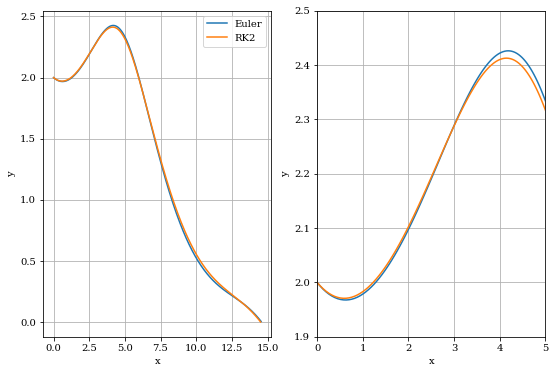

In [52]:
# plot of the glider's path
print('Distance traveled: {:.3f}'.format(x_rk2[index_ground_rk2 -1]))

py.figure(figsize = (9.0, 6.0))

py.subplot(121)
py.grid()
py.xlabel('x')
py.ylabel('y')
py.plot(x_euler[:index_ground_euler], y_euler[:index_ground_euler],
           label = 'Euler')
py.plot(x_rk2[:index_ground_rk2], y_rk2[:index_ground_rk2],
           label = 'RK2')
py.legend();

py.subplot(122)
py.grid()
py.xlabel('x')
py.ylabel('y')
py.plot(x_euler, y_euler, label = 'Euler')
py.plot(x_rk2, y_rk2, label = 'RK2')
py.xlim(0.0, 5.0)
py.ylim(1.9, 2.5);

Both Euler and RK2 methods will converge to the same solution as we refine the grid - but at different rates, RK2 gets more accurate faster, as $\Delta t$ gets smaller

## Grid - Convergence

The code below uses a `for` - lopp that computes the solution on different time grids, with the coarses and finest grid differing by 100x. 

In [53]:
# set the list of time-step sizes to investigate
dt_values = [0.1, 0.04, 0.01, 0.005, 0.001]

# empy list to store the solution for each time step size
u_values = []

for dt in dt_values:
    N = int(T/dt) + 1  # number of time-steps
    
    # initial conditions
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    # time integration using RK2 method
    for n in range(N-1):
        u[n+1] = rk2(u[n], rhs_phugoid, dt, CL, CD, g, vt)
        u_values.append(u)

In [54]:
# computes the differences in the x - position for all grids
diff_values = []
for u, dt in zip(u_values, dt_values):
    diff = l1_diff(u[:,2], u_values[-1][:,2], dt)
    diff_values.append(diff)

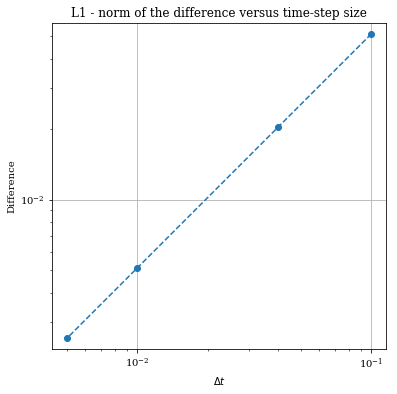

In [57]:
# plot difference versus time-step size
py.figure(figsize = (6.0, 6.0))
py.title('L1 - norm of the difference versus time-step size')
py.xlabel('$\Delta t$')
py.ylabel('Difference')
py.grid()
py.loglog(dt_values[:-1], diff_values[:-1],
         color = 'C0', linestyle = '--', marker = 'o')
py.axis('equal');

To compute the observed order of convergence, the code below uses three grid resolution that refined at a constant rate, $r = 2$

In [59]:
r = 2  # time-step sie refinement ratio
h = 0.001  # finest time-step size

dt_values = [h, r*h, r**2 *h]
u_values = []

for dt in dt_values:
    N = int(T/dt) + 1  # number of time-steps
    
    # initial conditions
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    # time integration using RK2
    for n in range(N-1):
        u[n+1] = rk2(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    # solution fo the present time grid
    u_values.append(u)
    
# computes the observed order of convergence
p = (math.log(l1_diff(u_values[2], u_values[1], dt_values[2]) /
                 l1_diff(u_values[1], u_values[0], dt_values[1])) /
                    math.log(r))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.996


## Multi - Step Methods

* involving the calculation of the solution $u_{n+1}$ the known solution at $u_{n-1}$, in addition to $u_{n}$

* by applying centered difference approximation of the derivative $u'$:

$$ u'(t) \approx \frac{u_{n+1} - u_{n-1}}{2\Delta t} $$

* then, $$ u_{n+1} = u_{n-1} + 2\Delta t \, f(u_n) $$

* This is known as the leapfrog method.
    * where the time interval between these two solutions is $2\Delta t$

In [61]:
# leapfrog method
""" Returns the solution at the next time step
        using leapfrog method
    ----------------------------------------
    prev : nump.ndarray, solution at the time step 
        n - 1 as a 1D array of floats
    u : numpy.ndarray, solution at the previous time
        step as a 1D array of floats
    f : function, computes the right hand side of the system
    dt : float, time-step size
    args : tuple, optional, positional arguments to pass
                the function f
""" 

def leapfrog(prev, u, f, dt, *args):
    u_new = prev + 2.0*dt*f(u,*args)
    return u_new

Multi-step methods are not $self-starting$.

In [63]:
# Parameters
g = 9.81  # gravitational acceleration, m/s^2
vt = 4.9  # trim velocity, m/s
CD = 1.0 / 5.0  # drag coefficient
CL = 1.0  # lift coefficient

# Initial Conditions
v0 = 6.5  # start at the trim velocity
theta0 = -0.1  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 2.0  # vertical position, altitude

# time discretization
T = 15.0  # length of time interval
dt = 0.01  # time-step size
N = int(T/dt) + 1  # number of time steps

# arrays to store the solution at each time-step
u_leap = numpy.empty((N,4))
# initial conditions
u_leap[0] = numpy.array([v0, theta0, x0, y0])
# use the RK2 method for the first time step
u_leap[1] = rk2(u_leap[0], rhs_phugoid, dt, CL, CD, g, vt)

In [64]:
# Time integration using the leapfrog method
for n in range(1, N-1):
    u_leap[n+1] = leapfrog(u_leap[n-1], u_leap[n],
                           rhs_phugoid, dt, CL, CD, g, vt)

In [65]:
# Glider's position over the time
x_leap = u_leap[:,2]
y_leap = u_leap[:,3]

# gets the index of the first negative element of y_leap
index_neg_leap = numpy.where(y_leap < 0.0)[0]
if len(index_neg_leap) == 0:
    index_ground_leap = N - 1
    print('[leapfrog] Glider has not touched ground yet!')
else:
    index_ground_leap = index_neg_leap[0]

Distance traveled: 14.516


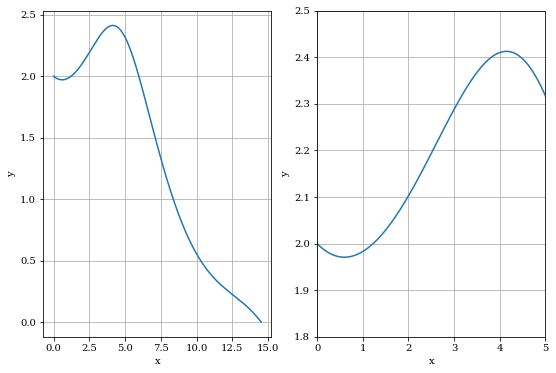

In [67]:
print('Distance traveled: {:.3f}'.format(x_leap[index_ground_leap - 1]))

# Plot of the glider's path for the leapfrog scheme
py.figure(figsize = (9.0, 6.0))
py.subplot(121)
py.grid()
py.xlabel('x')
py.ylabel('y')
py.plot(x_leap[:index_ground_leap], y_leap[:index_ground_leap])

py.subplot(122)
py.grid()
py.xlabel('x')
py.ylabel('y')
py.plot(x_leap, y_leap)
py.xlim(0.0, 5.0)
py.ylim(1.8, 2.5);

In [72]:
# Order of convergence
r = 2  # time-step sie refinement ratio
h = 0.001  # finest time-step size

dt_values = [h, r*h, r**2 *h]
u_values = []

for dt in dt_values:
    N = int(T/dt) + 1  # number of time-steps
    
    # initial conditions
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Use RK2 for the first time step
    u[1] = rk2(u[0], rhs_phugoid, dt, CL, CD, g, vt)
    
    # time integration using leapfrog scheme
    for n in range(1, N-1):
        u[n+1] = leapfrog(u[n-1], u[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    # solution fo the present time grid
    u_values.append(u)
    
# computes the observed order of convergence
p = (math.log(l1_diff(u_values[2][:, 2], u_values[1][:, 2],
                      dt_values[2]) /
              l1_diff(u_values[1][:, 2], u_values[0][:, 2],
                      dt_values[1])) /
    math.log(r))
     
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 2.187
